# 1. Solving a Simple Linear Regression Model Analytically with a Mock Dataset

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (25/11/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np

### Mock dataset generation

We will create a dataset, which uses surfaces with values drawn randomly between *min_surf* and *max_surf* values.
We will use four helper functions: *surface()*, *price()*, *get_x_list()* and *get_y_list()*.
Eventually, we obtain two list of *n_points*:
- The first one, *inputs*, contains *n_points* values, corresponding to surface values drawn randomly between *min_surf* and *max_surf* values.
- The second one, *outputs*, contains *n_points* values, corresponding to price values drawn randomly, assuming that the price is 14373 times the surface in sqm, +/- 5%.

In [2]:
# Two random generator functions to generate a mock dataset.
# 1. Surfaces randomly generated as uniform between 20sqm and 150sqm.
min_surf = 20
max_surf = 150
def surface(min_surf, max_surf):
    return round(np.random.uniform(20, 150))

# 2. Price is 14373 times the surface in sqm, +/- 5%
# (randomly decided to give the dataset some diversity).
def price(surface):
    return round((14373*surface)*(1 + np.random.uniform(-0.1, 0.1)))/1000000

In [3]:
# Two helper functions to split the dataset
# in list of x and y values.
def get_x_list(l):
    return [v[0] for v in l]
def get_y_list(l):
    return [v[1] for v in l]

In [4]:
# Dataset generation (n_points points will be generated).
# We will use a seed for reproducibility.
np.random.seed(47)
n_points = 50
dataset = [(s := surface(min_surf, max_surf), price(s)) for _ in range(n_points)]
print(dataset)

[(35, 0.550793), (115, 1.603793), (112, 1.706235), (104, 1.469261), (112, 1.528208), (53, 0.68925), (33, 0.455378), (103, 1.427778), (44, 0.68518), (55, 0.754712), (144, 1.915359), (117, 1.515239), (131, 1.956655), (92, 1.43742), (87, 1.169825), (90, 1.240135), (21, 0.325002), (105, 1.642652), (117, 1.603347), (67, 0.968076), (91, 1.244814), (43, 0.600822), (38, 0.534058), (81, 1.273376), (39, 0.562145), (89, 1.22937), (41, 0.600715), (33, 0.480756), (70, 0.922547), (93, 1.376274), (106, 1.428848), (144, 1.887174), (134, 2.035285), (53, 0.826838), (78, 1.093549), (136, 2.054049), (121, 1.870976), (83, 1.145933), (78, 1.127402), (99, 1.430111), (147, 2.15595), (129, 1.700365), (83, 1.28847), (139, 1.884722), (72, 1.044205), (103, 1.472611), (93, 1.360558), (61, 0.921997), (131, 1.874013), (132, 1.958295)]


In [5]:
# Separate inputs and outputs
inputs = get_x_list(dataset)
outputs = get_y_list(dataset)
print(inputs)
print(outputs)

[35, 115, 112, 104, 112, 53, 33, 103, 44, 55, 144, 117, 131, 92, 87, 90, 21, 105, 117, 67, 91, 43, 38, 81, 39, 89, 41, 33, 70, 93, 106, 144, 134, 53, 78, 136, 121, 83, 78, 99, 147, 129, 83, 139, 72, 103, 93, 61, 131, 132]
[0.550793, 1.603793, 1.706235, 1.469261, 1.528208, 0.68925, 0.455378, 1.427778, 0.68518, 0.754712, 1.915359, 1.515239, 1.956655, 1.43742, 1.169825, 1.240135, 0.325002, 1.642652, 1.603347, 0.968076, 1.244814, 0.600822, 0.534058, 1.273376, 0.562145, 1.22937, 0.600715, 0.480756, 0.922547, 1.376274, 1.428848, 1.887174, 2.035285, 0.826838, 1.093549, 2.054049, 1.870976, 1.145933, 1.127402, 1.430111, 2.15595, 1.700365, 1.28847, 1.884722, 1.044205, 1.472611, 1.360558, 0.921997, 1.874013, 1.958295]


We can then use matplotlib to display the dataset and see that there is a clear linear trend in this dataset.

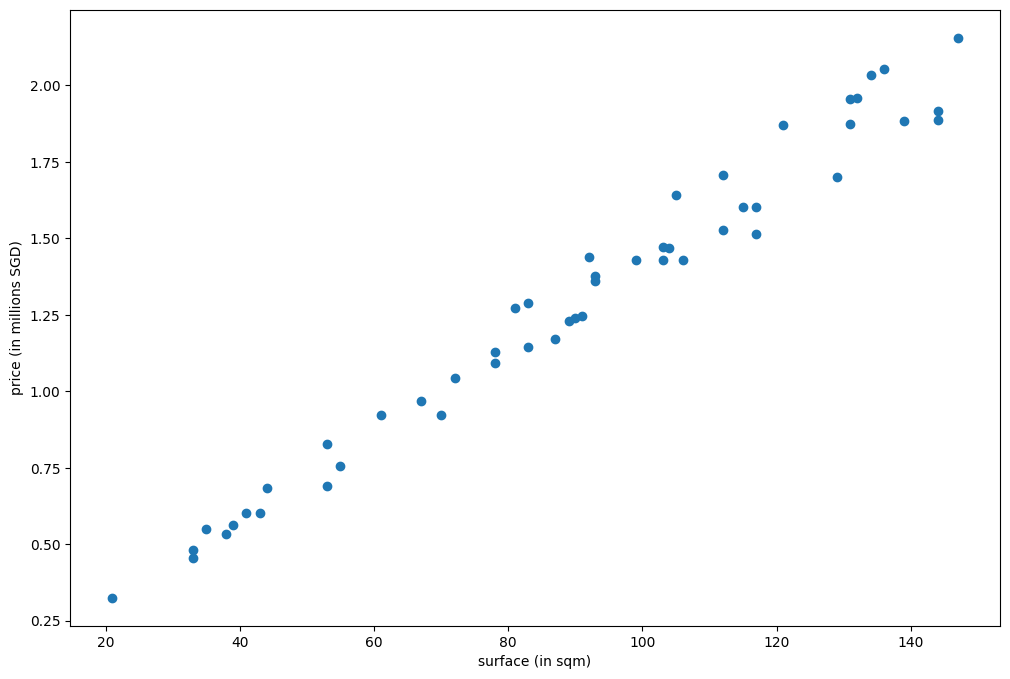

In [6]:
# Display dataset and see that there is a rather clear linear trend.
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")
plt.show()

### Linear Regression

Linear regression is a model, which assumes that there is a linear relationship between inputs $ x $ and outputs $ y $. It therefore consists of two parameters $ (a, b) $, which will connect any input $ x_i $ to its respective output $ y_i $, with the equation:

$$ y_i \approx a x_i + b $$

Below, we define the *linreg()* function, which produces a list of values to be used for display later.

In [7]:
# Linear regression has two trainable parameters (a and b).
# Other parameters, like min_surf, max_surf, n_points will
# help get points for the upcoming matplotlib displays.
def linreg(a, b, min_surf, max_surf, n_points = 50):
    return [(x, a*x + b) for x in np.linspace(min_surf, max_surf, n_points)]

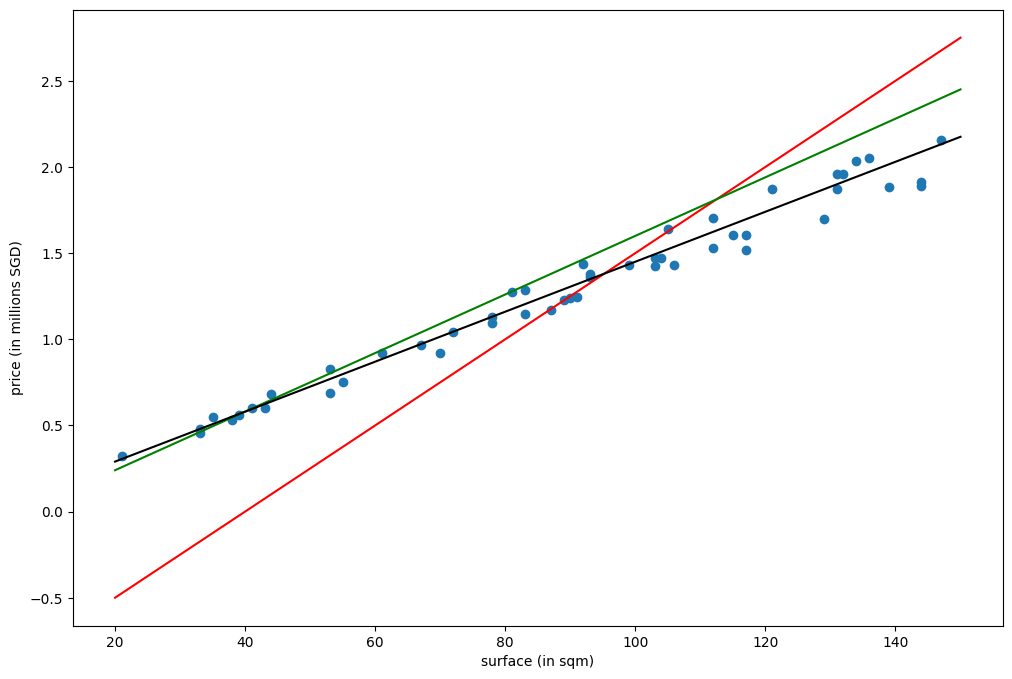

In [8]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Add some linreg
a1 = 25/1000
b1 = -1
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r')

# Another linreg
a2 = 17/1000
b2 = -0.1
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g')

# A final linreg
a3 = 14.5/1000
b3 = 0
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k')
plt.show()

### Loss function

In order to measure the quality of the parameters $ (a, b) $ used for the linear regression, we will use a loss function, namely the mean square error  $ L(a, b, x, y) $:

$$ L(a, b, x, y) = \frac{1}{N} \sum_{i=1}^N \left((a x_i + b) - y_i\right)^2 $$

With $ N $ being the number of points in the dataset (i.e. the value in the variable *n_points*).

In [9]:
# Mean square error as a loss function
def loss_mse(a, b, x, y):
    return sum([(y_i - (a*x_i + b))**2 for x_i, y_i in zip(x, y)])/len(x)

In [10]:
# The lower the loss function, the better the linear regression values (a, b) fit the dataset.
loss1 = loss_mse(a1, b1, inputs, outputs)
loss2 = loss_mse(a2, b2, inputs, outputs)
loss3 = loss_mse(a3, b3, inputs, outputs)
print(loss1, loss2, loss3)

0.1525897652268801 0.036650552106880015 0.006561636506880002


Below, we provide a full display with dataset entries, the three linear regressions and their loss values.

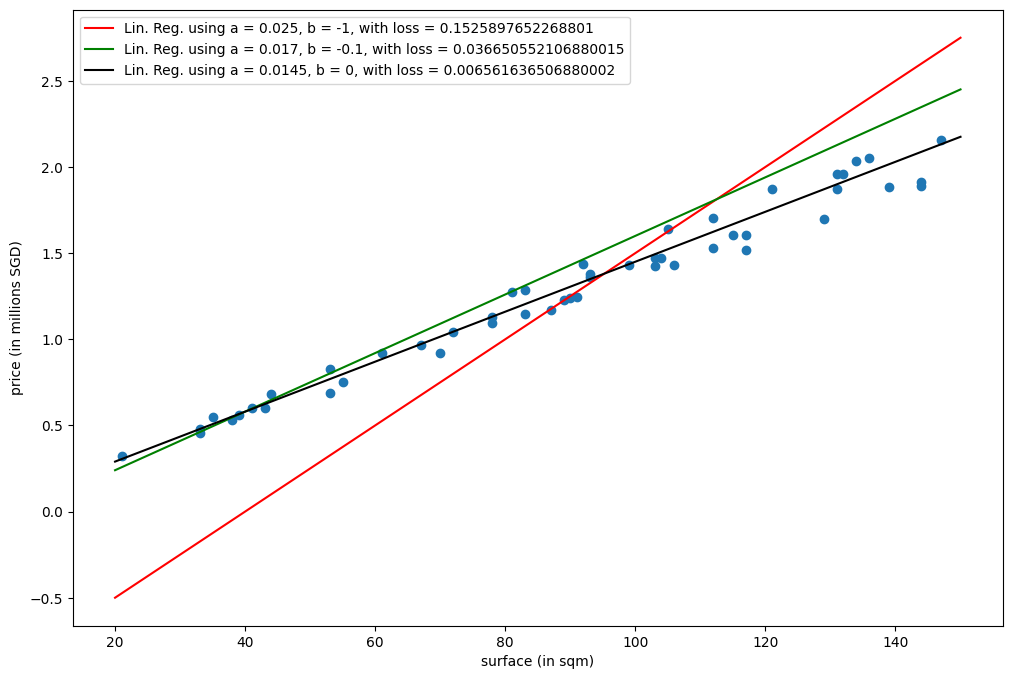

In [11]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Add some linreg
a1 = 25/1000
b1 = -1
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
loss1 = loss_mse(a1, b1, inputs, outputs)
legend1 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a1, b1, loss1)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r', label = legend1)

# Another linreg
a2 = 17/1000
b2 = -0.1
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
loss2 = loss_mse(a2, b2, inputs, outputs)
legend2 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a2, b2, loss2)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g', label = legend2)

# A final linreg
a3 = 14.5/1000
b3 = 0
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
loss3 = loss_mse(a3, b3, inputs, outputs)
legend3 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a3, b3, loss3)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k', label = legend3)

# Display
plt.legend(loc='best')
plt.show()

### Finding the optimal linear regression parameters, analytically

The best values $ (a^* , b^*) $ to be used for $ (a, b) $ can be found by solving the following optimization problem.

For any dataset of given inputs $ x = (x_i)_i $ and outputs $ y = (y_i)_i $, the best values $ (a^* , b^*) $ are defined as:

$$ (a^* , b^*) = \arg\min_{(a, b)} \left[ L(a, b, x, y) \right] $$

Or, equivalently:

$$ (a^* , b^*) = \arg\min_{(a, b)} \left[ \frac{1}{N} \sum_{i=1}^N \left((a x_i + b) - y_i\right)^2 \right] $$

Let us define the matrix notations, below:

$$ W = \begin{pmatrix} b \\ a \end{pmatrix}, $$

$$ X = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{pmatrix}, $$

$$ Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{pmatrix}, $$

Using these notations, we can prove that the optimal values $ (a^*, b^*) $, or equivalently $ W^* $, can be calculated as

$$ W^* = (X^T X)^{-1} X^T Y $$

In [12]:
# Defining the X matrix, following the notation above, as a numpy array.
X = np.array([[1, x_i] for x_i in inputs])
print(X)

[[  1  35]
 [  1 115]
 [  1 112]
 [  1 104]
 [  1 112]
 [  1  53]
 [  1  33]
 [  1 103]
 [  1  44]
 [  1  55]
 [  1 144]
 [  1 117]
 [  1 131]
 [  1  92]
 [  1  87]
 [  1  90]
 [  1  21]
 [  1 105]
 [  1 117]
 [  1  67]
 [  1  91]
 [  1  43]
 [  1  38]
 [  1  81]
 [  1  39]
 [  1  89]
 [  1  41]
 [  1  33]
 [  1  70]
 [  1  93]
 [  1 106]
 [  1 144]
 [  1 134]
 [  1  53]
 [  1  78]
 [  1 136]
 [  1 121]
 [  1  83]
 [  1  78]
 [  1  99]
 [  1 147]
 [  1 129]
 [  1  83]
 [  1 139]
 [  1  72]
 [  1 103]
 [  1  93]
 [  1  61]
 [  1 131]
 [  1 132]]


In [13]:
# Whiel we are at it, let us define the transposed version of X
XT = np.transpose(X)
print(XT)

[[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1   1   1   1   1   1   1   1   1   1   1   1   1]
 [ 35 115 112 104 112  53  33 103  44  55 144 117 131  92  87  90  21 105
  117  67  91  43  38  81  39  89  41  33  70  93 106 144 134  53  78 136
  121  83  78  99 147 129  83 139  72 103  93  61 131 132]]


In [14]:
# Defining the Y matrix, following the notation above, as a numpy array.
Y = np.array([[y_i] for y_i in outputs])
print(Y)

[[0.550793]
 [1.603793]
 [1.706235]
 [1.469261]
 [1.528208]
 [0.68925 ]
 [0.455378]
 [1.427778]
 [0.68518 ]
 [0.754712]
 [1.915359]
 [1.515239]
 [1.956655]
 [1.43742 ]
 [1.169825]
 [1.240135]
 [0.325002]
 [1.642652]
 [1.603347]
 [0.968076]
 [1.244814]
 [0.600822]
 [0.534058]
 [1.273376]
 [0.562145]
 [1.22937 ]
 [0.600715]
 [0.480756]
 [0.922547]
 [1.376274]
 [1.428848]
 [1.887174]
 [2.035285]
 [0.826838]
 [1.093549]
 [2.054049]
 [1.870976]
 [1.145933]
 [1.127402]
 [1.430111]
 [2.15595 ]
 [1.700365]
 [1.28847 ]
 [1.884722]
 [1.044205]
 [1.472611]
 [1.360558]
 [0.921997]
 [1.874013]
 [1.958295]]


In [15]:
# Defining W_star according to our formula
W_star = np.matmul(np.linalg.inv(np.matmul(XT,X)), np.matmul(XT,Y))
print(W_star)
b_star, a_star = W_star[0, 0], W_star[1, 0]
print("Optimal a_star value: ", a_star)
print("We used 14373/1000000 in the mock dataset generation, which is: ", 14373/1000000)
print("Optimal b_star value: ", b_star)
print("The value we used in the mock dataset generation: ", 0)

[[0.02458918]
 [0.01402749]]
Optimal a_star value:  0.014027488685199558
We used 14373/1000000 in the mock dataset generation, which is:  0.014373
Optimal b_star value:  0.024589183127232947
The value we used in the mock dataset generation:  0


Finally, we provide a final display, showing the optimal linear regression model, in magenta, below.

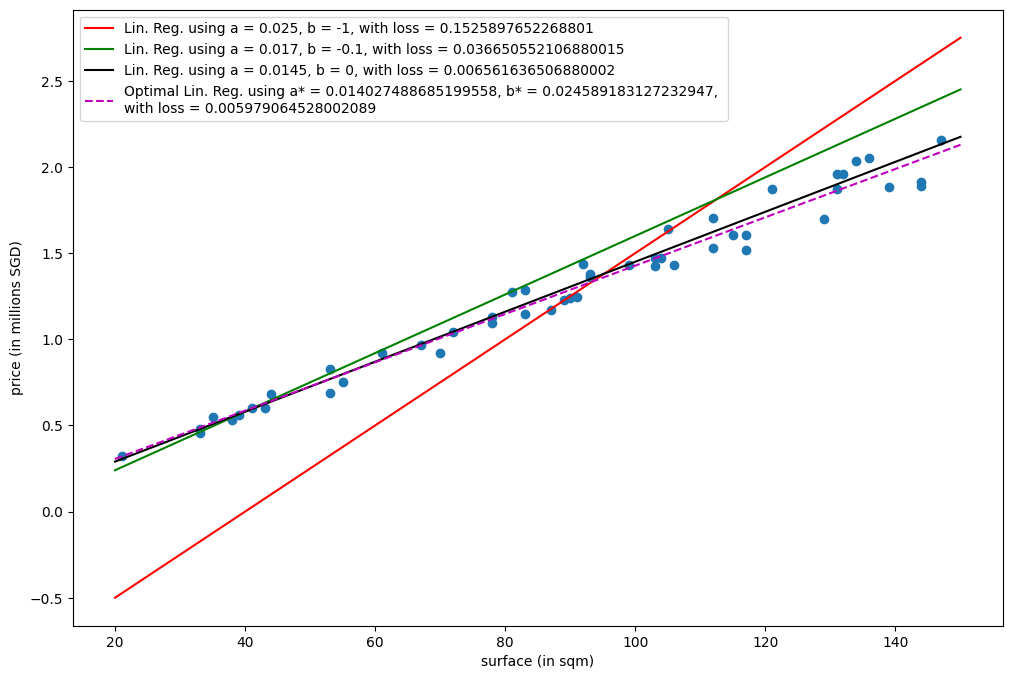

In [16]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Add some linreg
a1 = 25/1000
b1 = -1
linreg_dataset1 = linreg(a1, b1, min_surf, max_surf, n_points)
loss1 = loss_mse(a1, b1, inputs, outputs)
legend1 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a1, b1, loss1)
plt.plot(get_x_list(linreg_dataset1), get_y_list(linreg_dataset1), 'r', label = legend1)

# Another linreg
a2 = 17/1000
b2 = -0.1
linreg_dataset2 = linreg(a2, b2, min_surf, max_surf, n_points)
loss2 = loss_mse(a2, b2, inputs, outputs)
legend2 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a2, b2, loss2)
plt.plot(get_x_list(linreg_dataset2), get_y_list(linreg_dataset2), 'g', label = legend2)

# A final linreg
a3 = 14.5/1000
b3 = 0
linreg_dataset3 = linreg(a3, b3, min_surf, max_surf, n_points)
loss3 = loss_mse(a3, b3, inputs, outputs)
legend3 = "Lin. Reg. using a = {}, b = {}, with loss = {}".format(a3, b3, loss3)
plt.plot(get_x_list(linreg_dataset3), get_y_list(linreg_dataset3), 'k', label = legend3)

# Optimal linreg
linreg_dataset4 = linreg(a_star, b_star, min_surf, max_surf, n_points)
loss4 = loss_mse(a_star, b_star, inputs, outputs)
legend4 = "Optimal Lin. Reg. using a* = {}, b* = {}, \nwith loss = {}".format(a_star, b_star, loss4)
plt.plot(get_x_list(linreg_dataset4), get_y_list(linreg_dataset4), 'm--', label = legend4)

# Display
plt.legend(loc='best')
plt.show()